# JSON, XML

- 구조체로 다 싸야. 모두가 다 text
- 언어에, machine에 종속하지 않는다. 독립

## JSON
    - JavaScript Object Notation
    - designed for human-readable data interchange(사람이 해석하기 쉽다)
    - extended from the javascript scripting language
    - internet media type is application/json, extention is .json

## why use JSON
    - 네트워크를 이용해 통신을 주고 받을 때
    - used for serializing and transmitting structrued data over network connection
    - 네트워크에서 정보를 주고 받을 때, 무조건 '바이트' 단위로 

## 장점
- 아주 가볍다. text-based Language independent
- 문법이 쉽다. programming language independent
- 읽고 쓰기 쉽다

## StringifY
- 내가 만든 object를 시리얼화시켜준다
- 무조건 바이트로 넘겨야
- exchange data to/form a web server
- data has to be string

# JSON
### - 파이썬을 json으로 실행

In [1]:
import json

JSON은 이러한 호환 타입 객체를 인코딩한 바이트(bytes) 객체이며, 파이썬의 사전처럼 조작하거나 특정 키를 통해서 액세스할 수 없는 상태가 된다. JSON 호환 타입 객체를 JSON 데이터로 인코딩하는 함수가 dump() 이고, load()는 이런 데이터를 Python 객체로 환원한다. 각각의 함수에 s 가 붙은 버전은 “문자열 기반”으로 말 그대로 JSON을 표현하는 문자열로 변환하거나, 그 반대의 변환을 가리킨다. 즉, dumps()는 사전 객체를 JSON 문자열로 변환하고, loads()는 그 반대를 수행한다.

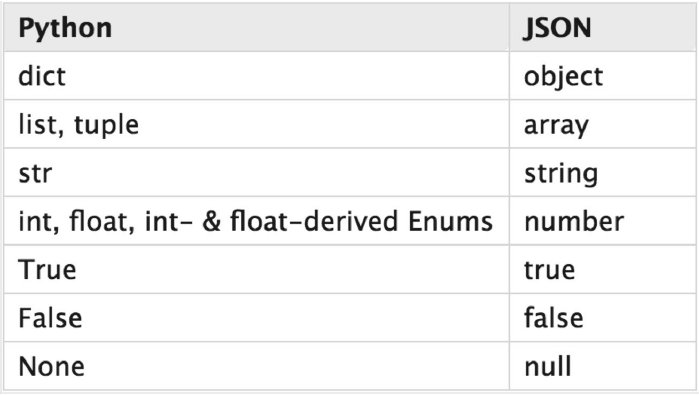

### dump/dumps
- 파이썬 타입을 string 타입으로

In [6]:
name = ( "KIM", "Lee", "Park")
age = [30, 28, 31]
person = {"name":"Kim", "age":30, "car" : False}

In [7]:
nameStr = json.dumps(name)
ageStr = json.dumps(age)
personStr = json.dumps(person, indent = "")

In [8]:
kname = ("김", "이", "박")
knameStr = json.dumps(kname)
print(knameStr)

knameStr = json.dumps(kname, ensure_ascii = False)
print(knameStr)

["\uae40", "\uc774", "\ubc15"]
["김", "이", "박"]


### load / loads
- string 타입의 object를 다시 파이썬 타입으로 바꾸는 것

In [9]:
personObj = json.loads(personStr)
person == personObj

True

In [10]:
person["car"] = ["레이", "모닝"]

with open("person.json", "w") as f:
    json.dump(person, f)

In [11]:
with open("person.json","r") as f:
    personObj = json.load(f)
    
personObj

{'name': 'Kim', 'age': 30, 'car': ['레이', '모닝']}

In [12]:
import urllib.request

In [45]:
url = "http://ip.jsontest.com"

obj = {"name":"김무개", "age":30}
objStr = json.dumps(obj)
objByte = objStr.encode("utf-8")

req= urllib.request.Request(url, data = objByte, headers = {'content-type': 'application/json'})
res = urllib.request.urlopen(req)

resByte = res.read()
resStr = resByte.decode("utf-8")
resObj = json.loads(resStr)

print(resByte, type(resByte))
print(resStr, type(resStr))
print(resObj, type(resObj))

HTTPError: HTTP Error 503: Service Unavailable

## Open API 활용하기
(전국 대기오염도 현황)

In [94]:
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getCtprvnRltmMesureDnsty"
params = {
    "serviceKey" : "IAuLRJv6H3XAdMqkRM%2BOouM7GEKstJUCrh7Bbw%2FDhO%2FRgFTc01JlMz%2Ff9AjWBtxS%2BRAVyxYAS9edDDAj31YOHw%3D%3D", 
    "numOfRows":10,
    "pageSize":10,
    "pageNo":1,
    "sidoName":"서울",
    "ver":"1.3",
    "_returnType":"JSON"
}

# 위의 값들을 받아 시리얼라이즈화시킨것
params["serviceKey"] = urllib.parse.unquote(params["serviceKey"])
params = urllib.parse.urlencode(params)
params = params.encode("utf-8") # string 형태를 bite 형태로

req = urllib.request.Request(url, data=params) #get 방식으로 날리고, request 객체 생성하고 서버로 날라간다
res = urllib.request.urlopen(req) # 날라간 데이터가 여기 있음

resStr = res.read() # 얘는 바이트
resStr = resStr.decode("utf-8") # 얘는 unicode (string), 딕셔너리이므로 키 value로 찾을 수 있다
resObj = json.loads(resStr) 

resJSON = json.dumps(resObj, indent="")
print(resJSON)

{
"list": [
{
"_returnType": "json",
"coGrade": "1",
"coValue": "0.3",
"dataTerm": "",
"dataTime": "2019-07-10 14:00",
"khaiGrade": "2",
"khaiValue": "54",
"mangName": "\ub3c4\uc2dc\ub300\uae30",
"no2Grade": "1",
"no2Value": "0.018",
"numOfRows": "10",
"o3Grade": "2",
"o3Value": "0.035",
"pageNo": "1",
"pm10Grade": "1",
"pm10Grade1h": "1",
"pm10Value": "12",
"pm10Value24": "11",
"pm25Grade": "1",
"pm25Grade1h": "1",
"pm25Value": "8",
"pm25Value24": "6",
"resultCode": "",
"resultMsg": "",
"rnum": 0,
"serviceKey": "",
"sidoName": "",
"so2Grade": "1",
"so2Value": "0.002",
"stationCode": "",
"stationName": "\uc911\uad6c",
"totalCount": "",
"ver": ""
},
{
"_returnType": "json",
"coGrade": "1",
"coValue": "0.3",
"dataTerm": "",
"dataTime": "2019-07-10 14:00",
"khaiGrade": "1",
"khaiValue": "45",
"mangName": "\ub3c4\ub85c\ubcc0\ub300\uae30",
"no2Grade": "1",
"no2Value": "0.027",
"numOfRows": "10",
"o3Grade": "1",
"o3Value": "0.021",
"pageNo": "1",
"pm10Grade": "1",
"pm10Grade1h": "1",
"pm10Va

In [95]:
resObj.keys()

dict_keys(['list', 'parm', 'ArpltnInforInqireSvcVo', 'totalCount'])

In [96]:
type(resObj)

dict

In [97]:
resObj["list"][0]["pm25Value"]

'8'

In [98]:
resObj["list"][9]["pm25Value"]

'8'

In [99]:
resObj["list"][0]["stationName"]

'중구'

In [102]:
for i in range(10):
    resObj["list"][i]["pm25Value"]
    print(resObj["list"][i]["pm25Value"])
  

8
5
7
9
5
5
4
7
3
8


In [100]:
[(k, type(resObj[k])) for k in resObj.keys()]

[('list', list),
 ('parm', dict),
 ('ArpltnInforInqireSvcVo', dict),
 ('totalCount', int)]

In [84]:
url = "http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?"
print(url)

http://openapi.airkorea.or.kr/openapi/services/rest/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty?


In [86]:
[{row["stationName"]:row["pm25Value"]} for row in range(10)]

TypeError: 'int' object is not subscriptable

In [103]:
import xml.etree.ElementTree as et

In [104]:
from lxml import etree

In [110]:
bookStore = et.Element("bookstore")

book1 = et.Element("book", category="cooking")
bookStore.insert(0,book1)

title1 = et.Element("title")
title1.attrib["lang"] = "en"
title1.text = "Everyday Italian"
book1.append(title1)

et.SubElement(book1, "author").text = "Giada De"
et.SubElement(book1, "year").text = "2005"
et.SubElement(book1, "price").text = "30.00"

book2 = et.Element("book", {"category":"children"})
bookStore.append(book2)

title2 = et.Element("title")
title2.attrib["lang"] = title1.get("lang")
title2.text = "Harry"
book2.append(title2)

et.SubElement(book2, "author").text = "Giada De"
et.SubElement(book2, "year").text = "2005"
et.SubElement(book2, "price").text = "30.00"

et.dump(bookStore)

<bookstore><book category="cooking"><title lang="en">Everyday Italian</title><author>Giada De</author><year>2005</year><price>30.00</price></book><book category="children"><title lang="en">Harry</title><author>Giada De</author><year>2005</year><price>30.00</price></book></bookstore>


In [131]:
root = et.XML(et.tostring(bookstore)) #이제 string

In [132]:
#self.children
print(len(root))
for childNode in root:
    print(childNode.tag, childNode.attrib)

0


In [133]:
root.clear()

In [134]:
root = et.fromstring(et.tostring(bookstore))

In [124]:
#self.children, list(element)
childNodes = root.getchildren()
print(len(childNodes))
for childNode in childNodes:
    print(childNode.tag, childNode.items())
    


0


C:\Users\SAMSUNG\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  


IndexError: list index out of range

In [126]:
for childNode in childNodes[0]:
    print(childNode.tag, childNode.keys())
    if childNode.keys() != []:
        print([childNode.get(k) for k in childNode.keys()])

IndexError: list index out of range

In [129]:
book = root.find("book")

In [130]:
print(book.tag, book.get("category"))

AttributeError: 'NoneType' object has no attribute 'tag'

In [128]:
bookList = root.findall("book")
for book in bookList:
    print(book.tag, book.get("category"))

In [135]:

xml0bj = etree.fromstring(resStr)
xmlRoot = etree.ElementTree(xml).getroot()

etree.dump(xmlRoot)

for node in xmlRoot.iter():
    print(node.tag, node.text)
    

XMLSyntaxError: Start tag expected, '<' not found, line 1, column 1 (<string>, line 1)